In [7]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error

ModuleNotFoundError: No module named 'pandas'

In [6]:
#Reading .csv files

anime_df = pd.read_csv('anime.csv')
rating_df = pd.read_csv('rating.csv')

NameError: name 'pd' is not defined

In [ ]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
df = pd.merge(rating_df,anime_df.drop('rating',axis=1),on='anime_id')

In [ ]:
df.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297


user_id     73515
anime_id    11197
rating         11
name        11196
genre        3154
type            6
episodes      184
members      6487
dtype: int64


<AxesSubplot:>

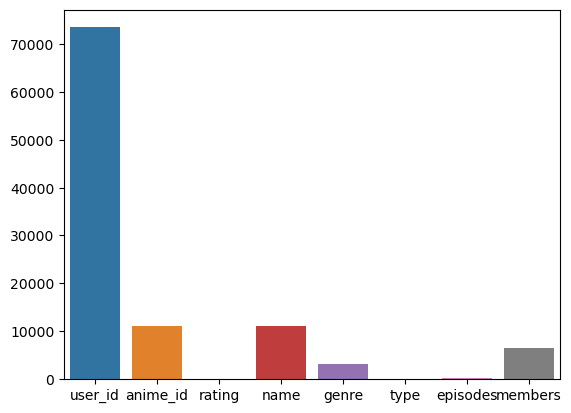

In [ ]:
print(df.nunique(axis=0))
sns.barplot(x = df.columns, y = df.nunique(axis=0))

In [ ]:
#Spliting data into train and test data set

train, test = train_test_split(df, test_size=0.2, random_state=42)

train.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
4465822,70390,23283,8,Zankyou no Terror,"Psychological, Thriller",TV,11,342893
4180496,38431,4182,7,Darker than Black: Kuro no Keiyakusha Special,"Comedy, Parody, Sci-Fi",Special,1,87609
1552972,42171,22729,10,Aldnoah.Zero,"Action, Mecha, Sci-Fi",TV,12,244193
2653132,8175,10521,9,Working&#039;!!,"Comedy, Slice of Life",TV,13,117328
2793500,69541,13851,10,To LOVE-Ru Darkness OVA,"Comedy, Ecchi, Harem, Romance, School, Sci-Fi,...",OVA,6,57166


In [ ]:
test.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
2375120,6155,5081,7,Bakemonogatari,"Mystery, Romance, Supernatural, Vampire",TV,15,482268
3188893,67150,59,7,Chobits,"Comedy, Drama, Ecchi, Romance, Sci-Fi, Seinen",TV,26,266846
4769282,19614,7311,9,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,240297
6887031,38937,158,7,Maria-sama ga Miteru,"Drama, Romance, Shoujo, Shoujo Ai, Slice of Life",TV,13,33989
1397707,27133,9989,8,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,"Drama, Slice of Life, Supernatural",TV,11,463835


In [ ]:
finalRating = pd.DataFrame(df.groupby('name')['rating'].mean())
finalRating['totalRating'] = pd.DataFrame(df.groupby('name')['rating'].count())
finalRating.head()

,rating,totalRating
name,,
&quot;0&quot;,2.769231,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936,782
&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535


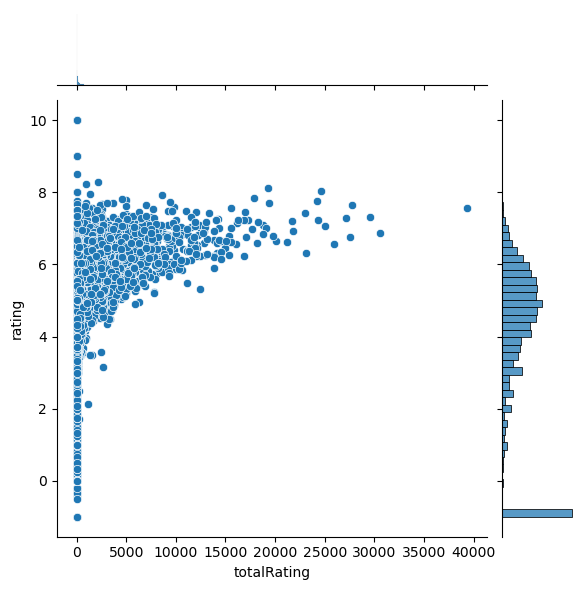

In [ ]:
#Plotting the rating and total rating from the dfRating

sns.jointplot(x='totalRating',y='rating',data=finalRating,alpha=1)

In [ ]:
#Creating the pivot table for reorganizing the data and summarizing the rating of anime for each user.

animePivot = df.pivot_table(index='name',columns='user_id',values='rating').fillna(0)


In [ ]:
animePivot

user_id,1,2,3,4,5,6,7,8,9,10,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xxxHOLiC Kei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xxxHOLiC Movie: Manatsu no Yoru no Yume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xxxHOLiC Rou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Defining the KNN model with sparse matrix and brute algorithm.

sparseAnime=csr_matrix(animePivot)
model=NearestNeighbors(algorithm='brute')
model.fit(sparseAnime)

NearestNeighbors(algorithm='brute')

In [4]:
#Defining the recommendation system method and course name as parameter.

def animeRecommendation(name):
    try:
        user_id=np.where(animePivot.index.str.lower()==name.lower())[0][0]
        distances, suggestions=model.kneighbors(animePivot.iloc[user_id,:].values.reshape(1,-1), n_neighbors=5)
        
        for i in range(len(suggestions)):
            print("Some recommendations for", name,"are:")
            print(animePivot.index[suggestions[i]])
    except:
        print("Sorry! couldn't find recommendation for the anime:",name)

In [ ]:
finalRating.sort_values('totalRating',ascending=False).head(30)

,rating,totalRating
name,,
Death Note,7.556177,39340
Sword Art Online,6.863159,30583
Shingeki no Kyojin,7.314089,29584
Code Geass: Hangyaku no Lelouch,7.641244,27718
Elfen Lied,6.753508,27506
Angel Beats!,7.278667,27183
Naruto,6.571726,25925
Fullmetal Alchemist,7.056048,25032
Fullmetal Alchemist: Brotherhood,8.028933,24574


In [2]:
#Taking user input for anime recommendation.

chooseAnime = input("Enter one anime: ")
print ('Selected anime:', chooseAnime)

Selected anime: Clannad


In [5]:
#Calling the recommendation method with user input

animeRecommendation(chooseAnime)

Sorry! couldn't find recommendation for the anime: Clannad


: 